# 10. Bayesian Statistics II: Normal data 

In the previous session, we looked at Bayesian inference for proportions. We now consider continuous data and explore Bayesian inference for data when they are assumed to follow a Normal distribution.  

<div class="alert alert-block alert-warning">
<b> Intended learning outcomes</b> 
    
By the end of this session you will be able to:

* Find the posterior for a Normally distributed mean when the variance of the data is known
* Find credible and HPD intervals for a Normally distributed mean 
* Find the Bayesian predictive distributions for Normal data and data summaries.  
</div>

## 10.1 Example: CD4 cell counts

In this session, we will use a dataset on CD4 cell counts which is available in R through the *boot* package. CD4 cells are in our blood as part of our immune system. Since these cells die in people who have HIV, CD4 cell counts are used in HIV patients to determine the health of their immune system and susceptibility to opportunistic infections. In this dataset, there are 20 patients with HIV. Their CD4 cell counts are recorded before and after they were put on treatment. We wish to investigate whether this treatment increased their CD4 cell counts.    
We install the *boot* package where the data is stored and we look at the data. Note that the unit of CD4 cell count is 100 $cells/mm^3$. We are interested in the difference in CD4 cell counts before and after treatment. We look at the summary statistics of the difference. 

In [1]:
library(boot)
ydata <- cd4$oneyear - cd4$baseline
data <- cbind(cd4, y=ydata)
data
summary(ydata)

baseline,oneyear,y
2.12,2.47,0.35
4.35,4.61,0.26
3.39,5.26,1.87
2.51,3.02,0.51
4.04,6.36,2.32
5.10,5.93,0.83
3.77,3.93,0.16
3.35,4.09,0.74
4.10,4.88,0.78
3.35,3.81,0.46


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6000  0.2675  0.6650  0.8050  1.3775  2.3200 

In the classical framework, we could use a paired t-test to see if the mean change in CD4 cell counts is significantly different from the null hypothesis value of zero ($H_0: \mu = \mathbb{E}[Y]=0)$.   

For our Bayesian analysis, we will assume these measurements come from a Normal distribution with an unknown mean $\mu$, 
which represents the mean change in CD4 counts. We will assume that the variance is known to be $\sigma^2 = 0.7$. This is slightly artificial as, in a real example, we may not know what the true variance is; however, we might be able to infer the variability of CD4 counts from earlier studies. Having both $\mu$ and $\sigma^2$ unknown requires a more complicated analysis which we will not cover in this course. The Bayesian analysis involves constructing a likelihood for the data, specifying an appropriate prior distribution and combining them to obtain a posterior distribution. We will then describe how credible intervals for $\mu$, and prior and posterior predictive distributions can be found. 

## 10.2 Calculating the posterior for the mean of a Normal distribution

In this section, we obtain the posterior for the mean of a Normal distribution with known variance, $\sigma^2$. Suppose we have $n$ observed independent data points, each assumed to come from the Normal distribution: $y_1,\dots,y_n \sim N(\mu,\sigma^2)$. Recall that the Normal distribution has probability density function given by
\begin{align}
p(y \mid \mu, \sigma^2) = \left( \frac{1}{2\pi\sigma^2} \right)^{1/2} 
\exp\left\{-\frac{1}{2\sigma^2}(y-\mu)^2\right\}.
\end{align}

Note that some authors will parameterize the Normal distribution with the *precision* instead of the variance: $\eta=\frac{1}{\sigma^2}$.

### 10.2.1 Likelihood

Since we assume all observations are independent, dropping the conditioning on $\sigma^2$, the likelihood is the product of the $n$ individual p.d.f.s:

\begin{align}\notag
p(y_1,\dots,y_n \mid \mu) 
&= p(y_1 \mid \mu) p(y_2 \mid \mu) \dots p(y_n \mid \mu) \\
&= \prod_{i=1}^n p(y_i \mid \mu) \\
&=
\left( \frac{1}{2\pi \sigma^2}\right)^{n/2} \exp\left\{
-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-\mu)^2 \right\}
\end{align}
Notice that
\begin{align*}\sum_{i=1}^n (y_i - \mu)^2 & = \sum_{i=1}^n (y_i - \bar
y + \bar y  -
\mu)^2 \\
& = \sum_{i=1}^n (y_i-\bar y)^2 + n(\bar y - \mu)^2, \mbox{ since }
\sum_{i=1}^n (y_i-\bar y)=0,\\
& = (n-1)s^2 + n(\bar y - \mu)^2,
\end{align*}

where (as usual) $s^2 = \sum_{i=1}^n (y_i - \bar y)^2 /(n-1).$
Thus the Likelihood can be written:
\begin{equation}
p(y_1,\dots,y_n \mid \mu) = 
\label{eq:normal} \left(\frac{1}{2\pi \sigma^2}\right)^{n/2} \exp\left\{
-\frac{1}{2\sigma^2}\left[(n-1)s^2 + n(\bar y - \mu)^2 \right]   \right\}.
\end{equation}
Since we are interested in the posterior for $\mu,$ we can drop all
terms not involving $\mu,$ so the likelihood is proportional to
\begin{align}\notag
p(y_1,\dots,y_n \mid \mu) \propto 
\exp\left\{ -\frac{n}{2\sigma^2} (\bar y - \mu)^2 \right\}.
\end{align}
Notice that this also has the same form of a Normal distribution for the mean $\bar{y}$, specifically, $\bar{y} \sim N(\mu, \frac{\sigma^2}{n})$.


### 10.2.2 Prior 

We noted in the previous session that the Normal distribution is a conjugate prior when the likelihood is a Normal distribution. Thus, for convenience, we will use a Normal distribution as a prior for $\mu$: 
$$
\mu  \sim N(\phi, \tau^{2}),
$$
as the posterior distribution will conveniently be a Normal distribution as well. The prior parameters $\phi$ and $\tau^2$ should be specified based on prior knowledge of $\mu$ and the uncertainty around this prior knowledge. It may come from previous research or formally elicited from investigators. If no prior evidence is available, we assign an appriopriately large value to $\tau$. 

### 10.2.3 Posterior 

To derive the posterior for the mean $\mu$, we need to find the  distribution of that parameter conditional on the data (both the empirical data and prior distribution). In the following calculation, we are only interested in the parts of the p.d.f. that depend on $\mu$. Any terms not involving $\mu$ are part of the *normalisation constant*. This is part of the p.d.f., but does not affect the shape of the density. 

The posterior is given by
\begin{align}\notag
p(\mu \mid y_1,\dots,y_n) 
&\propto p(y_1,\dots,y_n \mid \mu) p(\mu) \\
&\propto \exp\left\{ -\frac{n}{2\sigma^2} (\bar y - \mu)^2 \right\}
\exp\left\{-\frac{1}{2\tau^2}(\mu-\phi)^2\right\} \\ \notag
& = \exp\left\{ -\frac{n}{2\sigma^2}(\bar{y}-\mu)^2
-\frac{1}{2\tau^2}(\mu-\phi)^2\right\} \\
\end{align}


Expanding the brackets and retaining only terms containing $\mu$: 

\begin{align}\notag
p(\mu \mid y_1,\dots,y_n) 
& \propto \exp\left\{ -\frac{n}{2\sigma^2 \tau^2}  (-2n\bar{y}\mu\tau^2 - n\mu^2\tau^2+\mu^2\sigma^2-2\mu\phi\sigma^2)
\right\} 
\end{align}

Completing the squared term for $\mu$:

\begin{align}\notag
p(\mu \mid y_1,\dots,y_n) 
&\propto \exp\left\{ -\frac{\tau^2 n + \sigma^2}{2 \sigma^2 \tau^2}\left(\mu - \frac{ \tau^2 n\bar{y} -\sigma^2\phi}{\tau^2n+\sigma^2}\right)^2\right\}
\end{align}


We can recognise this has the form the p.d.f. of the Normal distribution, therefore we see that
\begin{align}
\label{equ_posterior_mean}
\mu \vert y_1,\dots,y_n \sim N\left\{ \frac{ \tau^2 n\bar{y} + \sigma^2\phi }{\tau^2 n + \sigma^2}, \frac{\sigma^2\tau^2}{\tau^2n+\sigma^2} \right\}.
\end{align}


We see that: 
1. the Normal prior is *conjugate* for a Normal Likelihood, as the posterior is also Normal. 
2. The posterior mean, $\frac{ \tau^2 n\bar{y} + \sigma^2\phi }{\tau^2 n + \sigma^2}$ is a weighted average of the data $\bar y $ and the prior mean $\phi$: we can write it as $w \bar{y} + (1-w) \phi$, where $w= \frac{\tau^2 n}{\tau^2 n + \sigma^2}$ . Hence the posterior combines the information from the likelihood (data) and prior (a priori belief).    
3. The variance of the posterior is  $\frac{\sigma^2\tau^2}{\tau^2n+\sigma^2}$. In a larger study, since $n$ becomes very large, we have $\tau^2 >> \frac{\sigma^2}{n}$, so the posterior variance tends to zero.
4. In smaller studies, $\tau^2 << \frac{\sigma^2}{n}$, the posterior mean is closer to $\phi$ and the posterior variance depends both on the prior and sampling variance $\frac{\sigma^2\tau^2}{\tau^2n+\sigma^2}$. 

## 10.3 Credible Intervals

We saw in the previous session that a Bayesian $100(1 − \alpha)\%$ credible interval is an interval which contains $100(1 − \alpha)\% $ of the posterior distribution of the parameter, and the $100(1 -\alpha) \%$ Highest Posterior Density (HPD) interval ($\alpha \in (0,1)$) is the credible interval with the smallest range of values for $\theta$. 

Given that the posterior distribution has mean $\psi$ and variance $\gamma^{2}$, the $95\%$ HPD interval is given by 
$\psi \pm 1.96 \times \gamma$. Thus, for a standard Normal posterior, the 95% HPD interval is $(-1.96,1.96).$ 

### 10.3.1 CD4 cell counts example: 


In the CD4 cell count example, suppose that we have very strong prior information that suggests the treatment is not effective, and we expect that the difference in cell counts is approximately zero. Let us denote by $y$ the difference in CD4 cell counts. We set $\mu \sim N(0, 0.1)$ to reflect that there is only about $2.5\%$ chance that the treatment increases mean CD4 counts by more than 0.62 (1.96 $\times \sqrt{0.1}$) and a $50\%$ chance that it will actually decrease the mean CD4 count).   

Summarizing the information we have: 

> sample size $n = 20$  
> mean of data $\bar{y} = 0.805$  
> variance of data (assumed known) $\sigma^2 = 0.7$    
> prior mean $ \phi = 0$    
> prior variance $\tau^2= 0.1$     

We find the posterior distribution:
 
\begin{align}
\mu \vert y_1,\dots,y_n &\sim N\left\{ \frac{ \tau^2 n\bar{y} + \sigma^2\phi }{\tau^2 n + \sigma^2}, \frac{\sigma^2\tau^2}{\tau^2n+\sigma^2} \right\} \\
 &\sim N\left\{ \frac{ 0.1 \times 20 \times 0.805 + 0 }{0.1 \times 20 + 0.7}, \frac{0.7 \times 0.1}{0.1 \times 20 +0.7 } \right\} \\
 & \sim N\left\{ 0.596, 0.0259 \right\}
\end{align}

We plot below the prior distribution (in blue), the distribution of $\bar{y}$ (red) and the posterior distribution (purple). We observe that the mean of the posterior distribution is in between the mean of the prior and that of the likelihood. Note that in R, the Normal distribution is parameterized by the standard deviation rather than the variance. 

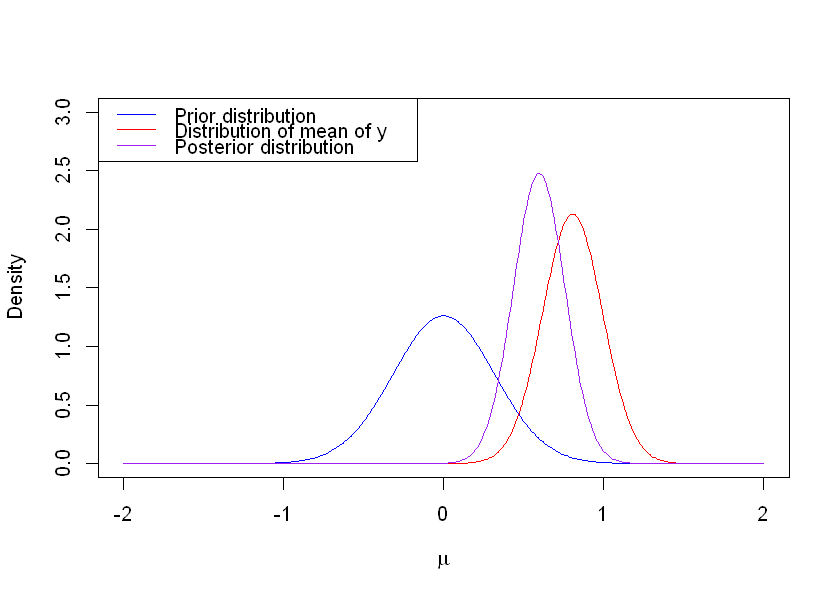

In [2]:
options(repr.plot.width=7, repr.plot.height=5)
x <- seq(-2, 2, 0.01)
#plot the prior 
y1 <- dnorm(x, mean=0, sd=sqrt(0.1))
plot(x, y1, type="l", lwd=1, col="blue", ylim=c(0,3), ylab="Density", xlab=expression(mu))
legend("topleft", legend=c("Prior distribution", "Distribution of mean of y", "Posterior distribution"),
       col=c("blue", "red", "purple"), lty=1)
#plot the observed distribution 
y2 <- dnorm(x, mean=0.805, sd=sqrt(0.7/20))
lines(x, y2, type="l", lwd=1, col="red")
y3 <- dnorm(x, mean=0.596, sd=sqrt(0.0259))
lines(x, y3, type="l", lwd=1, col="purple")

The  $95\%$ HPD interval can be calculated as $0.596 \pm 1.96 \times \sqrt{0.0259} = (0.281, 0.911)$. This interval lies wholly above zero, so we can state that we have a strong posterior belief that there is an increase in CD4 cell counts. 

## 10.4 Predictions 

### 10.4.1 Prior predictive distributions

Finding the predictive distribution for a new patient $y$ before making any observations involves finding the following distribution:

\begin{align}
p(y | \sigma^2, \phi, \tau^2) &= \int p(y, \mu | \sigma^2, \phi, \tau^2) d \mu\\
&= \int p(y | \mu, \sigma^2, \phi, \tau^2) p(\mu |  \phi, \tau^2) d \mu
\end{align}

This calculation involves a lot of algebra. We instead use a different approach: note that we can write the observation as $y = \mu + \epsilon$, where $\mu \sim N(\phi, \tau^2)$ and $\epsilon \sim N(0, \sigma^2)$. Then, since $\mu$ and $\epsilon$ are independent, we can use this result: 

> If X and Y be independent random variables that are Normally distributed, $X\sim N(\mu _{X},\sigma _{X}^{2})$ and $Y\sim N(\mu _{Y},\sigma _{Y}^{2})$, then their sum is also Normally distributed: $X + Y \sim N(\mu _{X}+\mu _{Y},\sigma _{X}^{2}+\sigma _{Y}^{2})$.

Thus we have that $y \sim N(\phi, \tau^2 + \sigma^2)$.


In our example, before collecting any data, suppose we wish to predict the probability that the difference in cell counts is greater than 0.3 (30 $cells/mm^3$). We have that $y \sim N(0, 0.1 + 0.7)$. We compute $p(y > 0.3)$:

In [3]:
1-pnorm(0.3, 0, sqrt(0.8))

[1] 0.3686578

Given our prior distribution alone, the probability that the change in CD4 count for a new patient will exceed 0.3 (30 $cells/mm^3$) is approximately 0.369.

### 10.4.2 Posterior predictive distributions


Suppose that have observed $y_1, ..., y_n $, and we want to predict future observations $z$, assuming that $z$ and $y_i$ are independent for all $1 \leq i \leq n$, conditional on $\mu$. The posterior predictive distribution for $z$ is given by,

\begin{align}
p(z| y_1, ..., y_n,  \sigma^2, \phi, \tau^2) &= \int p(z, \mu | y_1, ..., y_n,  \sigma^2, \phi, \tau^2) d \mu \\
     &= \int p(z | y_1, ..., y_n,\mu,  \sigma^2) p(\mu |y_1, ..., y_n,\sigma^2, \phi, \tau^2  ) d \mu. \\ 
\end{align}

Again, this involves some fiddly algebra but we can use a similar method to that we used for the prior predictive distribution. We wish to know what the predictive distribution of a new patient $z$ is, given the previous observations $y_1, ..., y_n$. We can write $z  = \mu + \epsilon$. We have that $\mu \vert y_1,\dots,y_n \sim N\left\{ \frac{ \tau^2 n\bar{y} + \sigma^2\phi }{\tau^2 n + \sigma^2}, \frac{\sigma^2\tau^2}{\tau^2n+\sigma^2} \right\}, $ and $\epsilon \sim N(0, \sigma^2)$. 

Using the result for the sum of two independent Normal distributions, the posterior predictive distribution has the form $ N\left\{ \frac{ \tau^2 n\bar{y} + \sigma^2\phi }{\tau^2 n + \sigma^2}, \frac{\sigma^2\tau^2}{\tau^2n+\sigma^2} + \sigma ^2\right\}$  

In our example, based on both prior and observed data, the predictive distribution for cell counts in a new patient being greater than 0.3 (30 $cells/mm^3$) is $N(0.596, 0.0259 + 0.7)$. We can compute $f(z | y_1, ..., y_n > 0.3)$:

In [4]:
1- pnorm(0.3, 0.596, sqrt(0.7259))

[1] 0.6358616

After having observed the data, the predictive probability that the next patient will have a difference in CD4 cell counts of greater than 0.3 (30 $cells/mm^3$) has increased substantially to 0.636.

## 10.5 Multiparameter models 

Suppose now that our likelihood has two unknown parameters, $(\mu,\sigma^2).$ In this case, we would need a prior distribution for both parameters, and our posterior distribution will now be bivariate. If desired we can summarise this by the mean and covariance matrix or by HPD contour maps. However, often in applications, interest focusses only on one parameter, say $\mu;$ the other parameter is usually referred to as a nuisance parameter. In Bayesian inference, we typically use simulation to draw from the posterior distribution of $(\mu,\sigma^2).$ For marginal inference for $\mu,$ we summarise the draws from $\mu$ in the usual way, across all simulated values of $\sigma^2$. Analytically, this is equivalent to integrating the posterior over $\sigma^2$: 

$$p(\mu | y) = \int p(\mu,\sigma^2 |y) \, d\sigma^2,$$

where we have used Bayes' theorem to obtain the posterior, i.e.$p(\mu,\sigma^2 |y).$ This integral may be intractable (hence the preference for simulation approaches). This will be covered in more detail in the Bayesian course next term. 

## 10.6 Further Reading


### 10.6.1 Resources for learning 

These textbooks are recommended for further learning and examples:

> - [Bayesian data analysis by Gelman et. al](http://www.stat.columbia.edu/~gelman/book/) can be downloaded in PDF format.  
> - [The Bugs Book by Lunn et. al.](https://www.mrc-bsu.cam.ac.uk/software/bugs/the-bugs-project-the-bugs-book/) is available at the LSHTM library.    
> - [an introductory book by Jim Stone with nice examples](http://jim-stone.staff.shef.ac.uk/BookBayes2012/HTML_BayesRulev5EbookHTMLFiles/ops/xhtml/ch01BayesJVSone.html) The first chapter is freely available online.    




### 10.6.2 Examples of applications 


> - [Article on Nature providing guidelines Bayesian analyses for genetic association studies](https://www.nature.com/articles/nrg2615).   
> - The potential benefits of incorporating prior information in the context of health care evaluation is discussed by [David Spiegelhalter in this article](https://projecteuclid.org/euclid.ss/1089808280).    
> - We mentioned earlier that Bayesian approaches can be helpful for overcoming challenges with small sample sizes in clinical trials for rare diseases; you can read more about this [in an article by Lilford et. al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2551510/pdf/bmj00623-0045.pdf)   